# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#### Important: Restart the Kernel before you move on to the next step.

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
# Define transforms
transform = transforms.ToTensor()

# Create training set and define training dataloader
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64)

# Create test set and define test dataloader
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
len(test_loader)

157

In [5]:
len(train_loader)

938

In [6]:
len(train_data)

60000

In [7]:
len(test_data)

10000

In [8]:
len(train_loader.dataset)

60000

In [9]:
len(test_loader.dataset)

10000

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?
transforms.ToTensor(): This transformation converts the image data from the original format (usually integers ranging from 0 to 255) into PyTorch's preferred format, which is a floating-point tensor. Each pixel's value is divided by 255 to ensure that the resulting tensor contains values between 0 and 1. This transformation is essential because deep learning models typically work with floating-point tensors, and this format is more suitable for gradient-based optimization algorithms. It also ensures that the model's inputs are appropriately scaled.

transforms.ToTensor(): This transformation converts the image data from the original format (usually integers ranging from 0 to 255) into PyTorch's preferred format, which is a floating-point tensor. Each pixel's value is divided by 255 to ensure that the resulting tensor contains values between 0 and 1. This transformation is essential because deep learning models typically work with floating-point tensors, and this format is more suitable for gradient-based optimization algorithms. It also ensures that the model's inputs are appropriately scaled.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [10]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

5


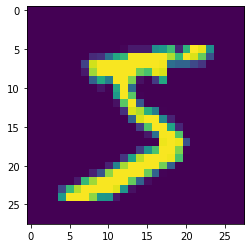

0


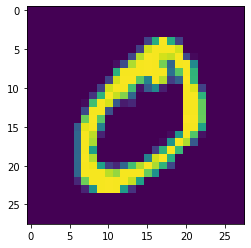

4


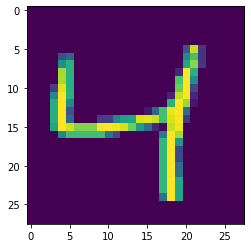

1


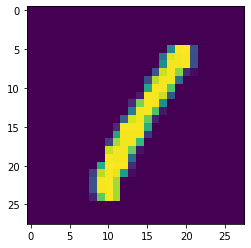

9


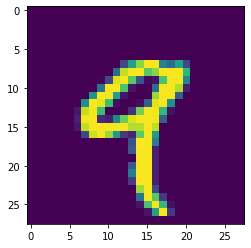

In [11]:
# Explore data
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [12]:
def build_neural_network():
    # Create a Sequential model to define the architecture
    model = nn.Sequential(
        # Flatten layer: This layer reshapes the input data from a 2D grid (28x28 pixels) into a 1D tensor (784 elements).
        nn.Flatten(),

        # Fully connected layer 1: This layer connects all 784 input features to 128 hidden units.
        nn.Linear(784, 128),

        # ReLU activation: Applies the Rectified Linear Unit (ReLU) activation function to introduce non-linearity.
        nn.ReLU(),

        # Fully connected layer 2: This layer connects the 128 hidden units to 64 hidden units.
        nn.Linear(128, 64),

        # ReLU activation: Another ReLU activation function applied to the outputs of the second layer.
        nn.ReLU(),

        # Fully connected layer 3: This layer connects the 64 hidden units to the output layer with 10 units.
        # For classification tasks, this layer often has as many units as there are classes.
        nn.Linear(64, 10)
    )

    return model

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [13]:
# Instantiate the model
model =build_neural_network()

# Set up the loss function
loss_function = nn.CrossEntropyLoss()

# Set up the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0009)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

## Testing your model
Using the previously created DataLoader for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further! If your accuracy is under 90%, you'll need to make improvements. Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [14]:
# Train the neural network
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Move the model to the available device (GPU or CPU)
model.to(device)

epochs = 5
print_every = 250
training_loss_values = []
accuracy_values = []

# Training loop
for epoch in range(epochs):
    model.train()
    training_loss = 0.0
    total_batches = len(train_loader)
    
    for batch_idx, (inputs, labels) in enumerate(train_loader):
        # Move inputs and labels to the default device
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Set all the gradients to zero for every parameter the optimizer is responsible for
        optimizer.zero_grad()

        # Forward pass
        outputs = model.forward(inputs)
        
        # Calculate the loss
        loss = loss_function(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        
        # Update parameters using computed gradients
        optimizer.step()
        
        training_loss += loss.item()
        
        if (batch_idx + 1) % print_every == 0:
            average_loss = training_loss / print_every
            training_loss_values.append(average_loss)
            training_loss = 0.0
            test_loss = 0
            accuracy = 0
            
            # Evaluation on the test set
            model.eval()
            
            correct_predictions = 0
            
            with torch.no_grad():
                for inputs, labels in test_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = model.forward(inputs)
                    batch_loss = loss_function(outputs, labels)
                    test_loss += batch_loss.item()
                    
                    # Testing the model
                    # Predicted labels with highest probability
                    _, predicted_labels = torch.max(outputs, dim=1)
                    # Number of correct predictions
                    correct_predictions += (predicted_labels == labels).sum().item()
                    # Total samples
                    samples = len(test_loader.dataset)
                    # Accuracy
                    accuracy = (correct_predictions / samples) * 100
                    accuracy_values.append(accuracy)
                    
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {average_loss:.3f}.. "
                  f"Test loss: {test_loss:.3f}.. "
                  f"Test accuracy: {accuracy:.3f}")

Epoch 1/5.. Train loss: 0.681.. Test loss: 50.942.. Test accuracy: 90.730
Epoch 1/5.. Train loss: 0.297.. Test loss: 37.260.. Test accuracy: 93.120
Epoch 1/5.. Train loss: 0.258.. Test loss: 32.186.. Test accuracy: 94.130
Epoch 2/5.. Train loss: 0.187.. Test loss: 24.579.. Test accuracy: 95.380
Epoch 2/5.. Train loss: 0.161.. Test loss: 22.437.. Test accuracy: 95.490
Epoch 2/5.. Train loss: 0.158.. Test loss: 21.460.. Test accuracy: 95.680
Epoch 3/5.. Train loss: 0.121.. Test loss: 17.412.. Test accuracy: 96.590
Epoch 3/5.. Train loss: 0.109.. Test loss: 17.523.. Test accuracy: 96.350
Epoch 3/5.. Train loss: 0.111.. Test loss: 19.265.. Test accuracy: 96.090
Epoch 4/5.. Train loss: 0.087.. Test loss: 14.734.. Test accuracy: 97.050
Epoch 4/5.. Train loss: 0.080.. Test loss: 14.926.. Test accuracy: 96.970
Epoch 4/5.. Train loss: 0.084.. Test loss: 18.156.. Test accuracy: 96.370
Epoch 5/5.. Train loss: 0.065.. Test loss: 13.738.. Test accuracy: 97.220
Epoch 5/5.. Train loss: 0.061.. Test l

Plot the training loss (and validation loss/accuracy, if recorded).

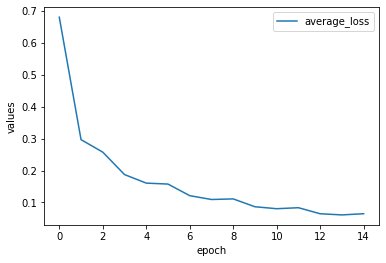

In [15]:
#Plot training loss
plt.plot(training_loss_values, label='average_loss')
plt.xlabel('epoch')
plt.ylabel('values')
plt.legend()
plt.show()

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [16]:
def build_neural_network():
    # Create a Sequential model to define the architecture
    model = nn.Sequential(
        # Flatten layer: This layer reshapes the input data from a 2D grid (28x28 pixels) into a 1D tensor (784 elements).
        nn.Flatten(),

        # Fully connected layer 1: This layer connects all 784 input features to 128 hidden units.
        nn.Linear(784, 128),

        # ReLU activation: Applies the Rectified Linear Unit (ReLU) activation function to introduce non-linearity.
        nn.ReLU(),
        
        # Dropout: Introduces dropout for regularization, randomly setting 15% of the weights to zero during training.
        nn.Dropout(p=0.15),

        # Fully connected layer 2: This layer connects the 128 hidden units to 64 hidden units.
        nn.Linear(128, 64),

        # ReLU activation: Another ReLU activation function applied to the outputs of the second layer.
        nn.ReLU(),

        # Fully connected layer 3: This layer connects the 64 hidden units to the output layer with 10 units.
        # For classification tasks, this layer often has as many units as there are classes.
        nn.Linear(64, 10),
        
        # LogSoftmax activation: Applies the Logarithmic Softmax activation function along the second dimension (across classes).
        nn.LogSoftmax(dim=1)
    )

    return model

#Instantiate the model
model = build_neural_network()
#set up loss function
loss_function=nn.NLLLoss()

#set up optimizer
optimizer=optim.SGD(model.parameters(), lr=0.02)

In [ ]:
# Train the neural network
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Move the model to the available device (GPU or CPU)
model.to(device)

epochs = 12
print_every = 250
training_loss_values = []
accuracy_values = []

# Training loop
for epoch in range(epochs):
    model.train()
    training_loss = 0.0
    total_batches = len(train_loader)
    
    for batch_idx, (inputs, labels) in enumerate(train_loader):
        # Move inputs and labels to the default device
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Set all the gradients to zero for every parameter the optimizer is responsible for
        optimizer.zero_grad()

        # Forward pass
        outputs = model.forward(inputs)
        
        # Calculate the loss
        loss = loss_function(outputs, labels)
         # Backward pass and optimization
        loss.backward()
        
        # Update parameters using computed gradients
        optimizer.step()
        
        training_loss += loss.item()
        
        if (batch_idx + 1) % print_every == 0:
            average_loss = training_loss / print_every
            training_loss_values.append(average_loss)
            training_loss = 0.0
            test_loss = 0
            accuracy = 0
            
            # Evaluation on the test set
            model.eval()
            
            correct_predictions = 0
            
            with torch.no_grad():
                for inputs, labels in test_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = model.forward(inputs)
                    batch_loss = loss_function(outputs, labels)
                    test_loss += batch_loss.item()
                    
                    # Testing the model
                    # Predicted labels with highest probability
                    _, predicted_labels = torch.max(outputs, dim=1)
                    # Number of correct predictions
                    correct_predictions += (predicted_labels == labels).sum().item()
                    # Total samples
                    samples = len(test_loader.dataset)
                    # Accuracy
                    accuracy = (correct_predictions / samples) * 100
                    accuracy_values.append(accuracy)
                    
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {average_loss:.3f}.. "
                  f"Test loss: {test_loss:.3f}.. "
                  f"Test accuracy: {accuracy:.3f}")

Epoch 1/12.. Train loss: 2.118.. Test loss: 270.203.. Test accuracy: 63.980


## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
# Save the model to a file
torch.save(model.state_dict(), 'my_model.pth')